In [2]:
from first_functions import *

In [5]:
directory_stations_2020 = "C:\\Users\\renan\\OneDrive\\Documentos\\GitHub\\Consume_and_Weather_dissertação\\dados_metereo_rj\\raw\\2020_rj"

os.chdir(directory_stations_2020)

In [6]:
df_stations_2023 = pd.read_csv('df_stations_final.csv')

In [19]:
df_stations_2023.columns

Index(['data', 'hora', 'precipitacao', 'pressao_atmosferica',
       'pressao_atmosferica_maxima', 'pressao_atmosferica_minima', 'radiacao',
       'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
       'temperatura_minima', 'temperatura_orvalho_maxima',
       'temperatura_orvalho_minima', 'umidade_relativa_maxima',
       'umidade_relativa_minima', 'umidade_relativa', 'vento_direcao',
       'vento_rajada', 'vento_velocidade', 'ano', 'mes', 'dia', 'regiao', 'uf',
       'estacao', 'codigo_wmo', 'latitude', 'longitude', 'altitude',
       'data_fundacao', 'y_'],
      dtype='object')

In [7]:
### necessário tratar missing values
"TRANSFORMAÇÃO DA BASE"

df_stations = tratando_missing_values(df_stations_2023)


#caso o usuário da biblioteca queira testar o efeito de algum outro dataset com variável nox é no mínimo necessário que
#os timesteps de ambas as bases estejam iguais para o possível join.

"função para transformação do timestep em data e hora e junção das bases nox"

# df_stations_nox = join_databases(df_stations, databasenox)

c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:390: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Preenche os valores ausentes com a média


'função para transformação do timestep em data e hora e junção das bases nox'

In [8]:
resultado = testar_modelos(df_stations)

KeyboardInterrupt: 

In [7]:
print(resultado)

NameError: name 'resultado' is not defined

In [20]:
models = {
    # 'Linear Regression': LinearRegression
    # 'Random Forest': RandomForestRegressor,
    # 'Gradient Boosting': GradientBoostingRegressor,
    'Support Vector Machine': SVR
    # 'K-Nearest Neighbors': KNeighborsRegressor
    # 'ARIMA': ARIMAModel
}

# Supondo que você tenha um DataFrame `data` com suas features e target
numeric_features = ['temperatura_orvalho','temperatura_ar', 'umidade_relativa','pressao_atmosferica']
categorical_features = [None]
target = 'precipitacao'

In [21]:
metrics_df = train_and_evaluate_models(models, df_stations, numeric_features, categorical_features, target)


               Model       MAE       MSE     RMSE          MAPE
0  Linear Regression  0.297449  1.573669  1.25446  6.988991e+14


c:\Users\renan\OneDrive\Documentos\GitHub\Projeto_inf2102\renan_morais_inf2102\first_functions.py:545: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=metrics_df, palette='viridis')


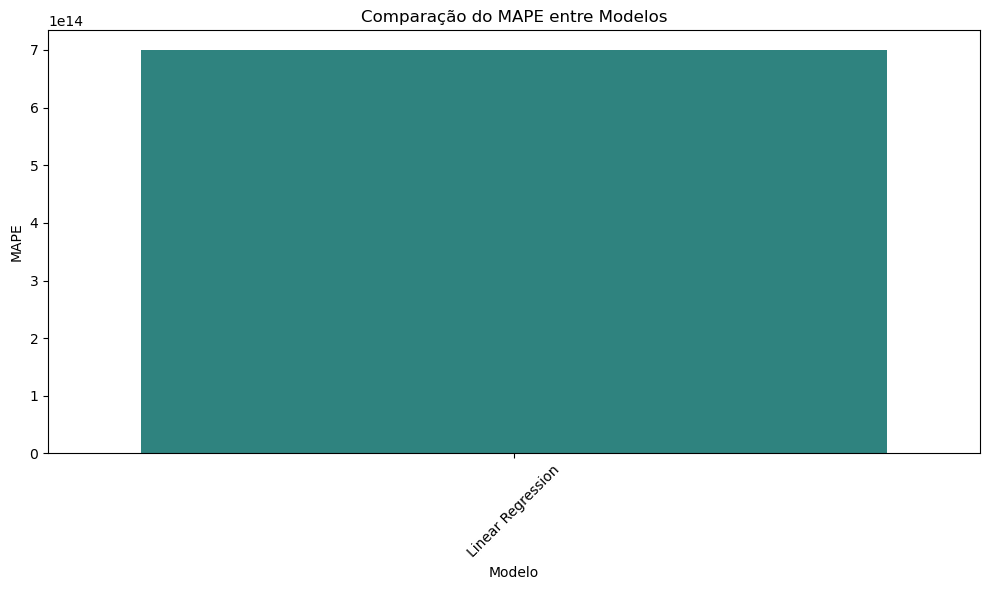

In [11]:
print(metrics_df)
plot_mape_comparison(metrics_df)

In [12]:

best_model_name, best_model_row = choose_best_model(metrics_df, metric='MAE')
best_model_class = models[best_model_name]

print(best_model_class)

print(f"O melhor modelo é: {best_model_name} com MAE: {best_model_row['MAE']}")
print(best_model_class)

best_model_stations = pipeline_generator(models[best_model_name](), numeric_features, categorical_features)

print(best_model_stations)

<class 'sklearn.linear_model._base.LinearRegression'>
O melhor modelo é: Linear Regression com MAE: 0.29744948043628855
<class 'sklearn.linear_model._base.LinearRegression'>
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temperatura_orvalho',
                                                   'temperatura_ar',
                                                   'umidade_relativa']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['codigo_wmo'])])),
                ('model', LinearRegressio

In [ ]:
plot_target_by_break_variable(df_stations, best_model_stations, numeric_features, categorical_features, target='precipitacao', break_variable='codigo_wmo')

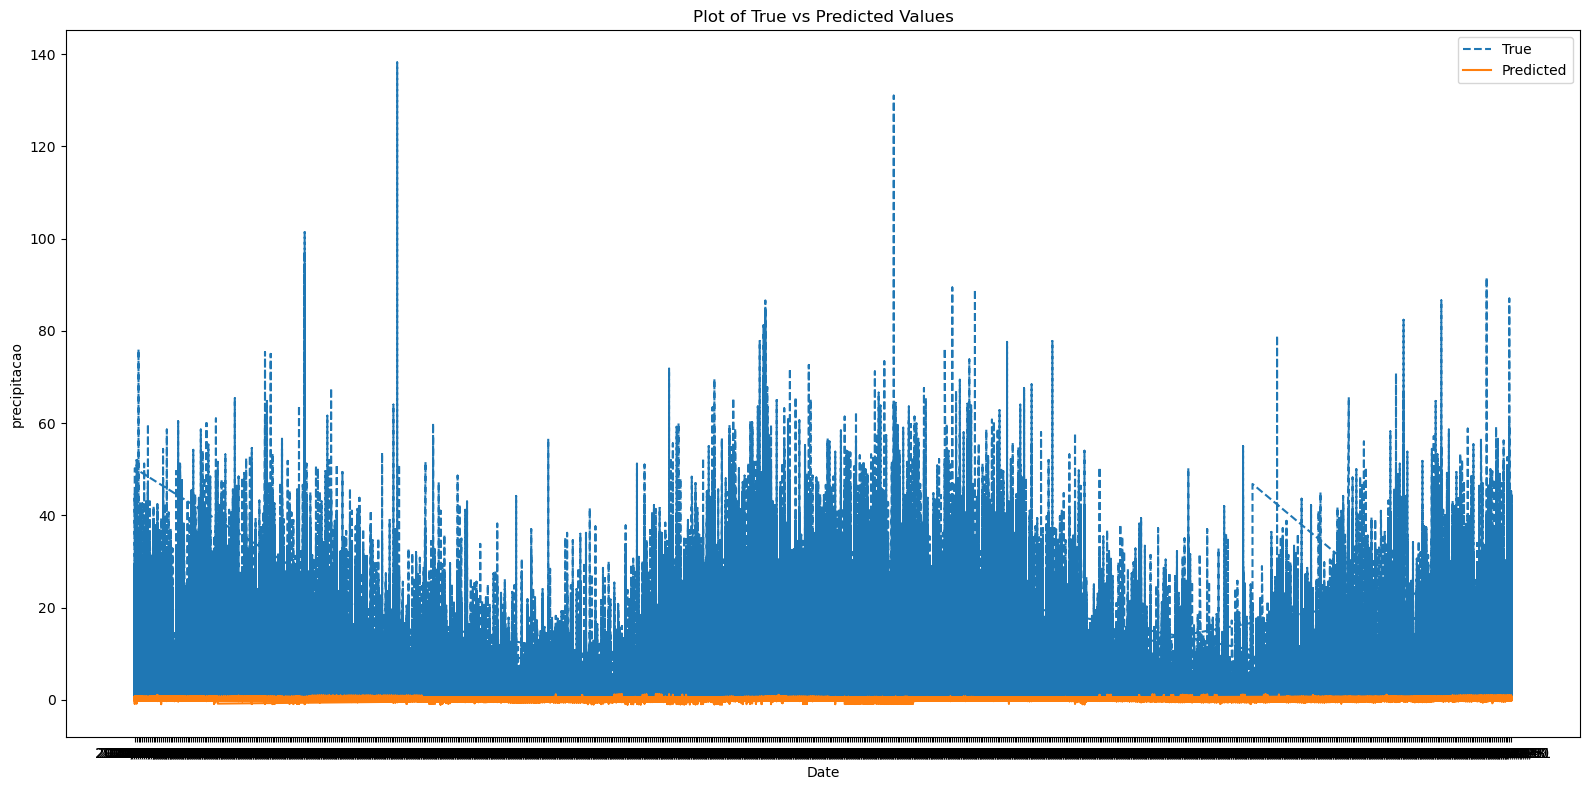

In [14]:
plot_target(df_stations, best_model_stations, numeric_features, categorical_features, target='precipitacao')